## Descrição do caso
https://www.kaggle.com/datasets/bhadramohit/mental-health-dataset

## Compreensivos Insights sobre Saúde Mental: Um Conjunto de Dados Diversificado de 1000 Indivíduos Através de Profissões, Países e Estilos de Vida

Este conjunto de dados oferece uma coleção rica de informações anônimas sobre saúde mental de 1000 indivíduos, representando uma ampla gama de idades, gêneros, profissões e países. O objetivo é esclarecer os diversos fatores que afetam a saúde mental, oferecendo insights valiosos sobre níveis de estresse, padrões de sono, equilíbrio entre trabalho e vida pessoal e atividade física.

Principais Características:

Demografia: O conjunto de dados inclui indivíduos de diversos países, como EUA, Índia, Reino Unido, Canadá e Austrália. Cada registro captura informações demográficas importantes, como idade, gênero e ocupação (por exemplo, TI, Saúde, Educação, Engenharia).

Condições de Saúde Mental: O conjunto de dados contém informações sobre se os indivíduos relataram problemas de saúde mental (Sim/Não), juntamente com a gravidade dessas condições, categorizadas em Baixa, Média ou Alta.

Histórico de Consultas: Para indivíduos com condições de saúde mental, o conjunto de dados indica se eles consultaram um profissional de saúde mental.
Níveis de Estresse: O nível de estresse de cada indivíduo é classificado como Baixo, Médio ou Alto, fornecendo insights sobre como diferentes fatores, como horas de trabalho ou sono, podem se correlacionar com o bem-estar mental.

Fatores de Estilo de Vida: O conjunto de dados inclui informações sobre duração do sono, horas de trabalho por semana e horas de atividade física semanal, oferecendo uma visão detalhada de como os fatores de estilo de vida contribuem para a saúde mental.

Este conjunto de dados pode ser usado para pesquisa, análise ou modelos de aprendizado de máquina para prever tendências de saúde mental, descobrir correlações entre equilíbrio entre trabalho e vida pessoal e bem-estar mental, e explorar o impacto do estresse e da atividade física na saúde mental.

## Definição do Problema 

# Definição do Problema
Este projeto visa analisar dados anônimos sobre saúde mental de 1000 indivíduos, representando diferentes idades, gêneros, profissões e países. O objetivo é identificar fatores que influenciam a saúde mental, como estresse, padrões de sono, equilíbrio entre trabalho e vida pessoal e atividade física.

## Questões a serem respondidas:
1. Quais fatores contribuem mais para altos níveis de estresse?
2. Como os padrões de sono estão relacionados aos problemas de saúde mental?
3. O equilíbrio entre trabalho e vida pessoal impacta a saúde mental?
4. A atividade física desempenha um papel importante na redução dos níveis de estresse?

## Métrica de Avaliação
Como estamos lidando com um problema de classificação (ex.: presença ou ausência de problemas de saúde mental), utilizaremos o F1-Score como métrica principal, pois consideramos tanto precisão quanto recall.


## Carregar Dados

In [1]:
# importar bibliotecas
import pandas as pd
import numpy as np

In [2]:

# Importar dados 
# Carregar o dataset
mental_health = pd.read_csv('C:/Users/karin/OneDrive/Área de Trabalho/data science/mental_health_dataset.csv')

# Exibir as primeiras linhas para verificar
mental_health.head()

,User_ID,Age,Gender,Occupation,Country,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours
0,1,36,Non-binary,Sales,Canada,No,Medium,Yes,Medium,7.1,46,5
1,2,34,Female,Education,UK,Yes,NaN,No,Low,7.5,47,8
2,3,65,Non-binary,Sales,USA,Yes,High,No,Low,8.4,58,10
3,4,34,Male,Other,Australia,No,Low,No,Medium,9.8,30,2
4,5,22,Female,Healthcare,Canada,Yes,Low,No,Medium,4.9,62,5


In [3]:
# Renomear colunas para português
mental_health.columns = [
    'ID_Usuario',
    'Idade',
    'Genero',
    'Ocupacao',
    'Pais',
    'Condicao_Saude_Mental',
    'Gravidade',
    'Historico_Consulta',
    'Nivel_Estresse',
    'Horas_Sono',
    'Horas_Trabalho',
    'Horas_Atividade_Fisica'
]

# Exibir as primeiras linhas para confirmar a mudança
mental_health.head()

,ID_Usuario,Idade,Genero,Ocupacao,Pais,Condicao_Saude_Mental,Gravidade,Historico_Consulta,Nivel_Estresse,Horas_Sono,Horas_Trabalho,Horas_Atividade_Fisica
0,1,36,Non-binary,Sales,Canada,No,Medium,Yes,Medium,7.1,46,5
1,2,34,Female,Education,UK,Yes,NaN,No,Low,7.5,47,8
2,3,65,Non-binary,Sales,USA,Yes,High,No,Low,8.4,58,10
3,4,34,Male,Other,Australia,No,Low,No,Medium,9.8,30,2
4,5,22,Female,Healthcare,Canada,Yes,Low,No,Medium,4.9,62,5


In [4]:
# Tamanho do dataframe
mental_health.shape

(1000, 12)

## Análise exploratória

In [6]:
mental_health.dtypes

ID_Usuario                  int64
Idade                       int64
Genero                     object
Ocupacao                   object
Pais                       object
Condicao_Saude_Mental      object
Gravidade                  object
Historico_Consulta         object
Nivel_Estresse             object
Horas_Sono                float64
Horas_Trabalho              int64
Horas_Atividade_Fisica      int64
dtype: object

In [7]:
# Contar valores nulos
print("Valores nulos por coluna:\n", mental_health.isnull().sum())

Valores nulos por coluna:
 ID_Usuario                  0
Idade                       0
Genero                      0
Ocupacao                    0
Pais                        0
Condicao_Saude_Mental       0
Gravidade                 501
Historico_Consulta          0
Nivel_Estresse              0
Horas_Sono                  0
Horas_Trabalho              0
Horas_Atividade_Fisica      0
dtype: int64


In [8]:
# Resumo estatístico para variáveis numéricas
print(mental_health.describe())

        ID_Usuario       Idade   Horas_Sono  Horas_Trabalho  \
count  1000.000000  1000.00000  1000.000000     1000.000000   
mean    500.500000    41.89200     7.095600       54.621000   
std     288.819436    13.97475     1.713861       14.709035   
min       1.000000    18.00000     4.000000       30.000000   
25%     250.750000    30.00000     5.600000       42.000000   
50%     500.500000    42.00000     7.100000       55.000000   
75%     750.250000    54.00000     8.500000       67.000000   
max    1000.000000    65.00000    10.000000       80.000000   

       Horas_Atividade_Fisica  
count             1000.000000  
mean                 5.134000  
std                  3.081808  
min                  0.000000  
25%                  3.000000  
50%                  5.000000  
75%                  8.000000  
max                 10.000000  


In [9]:
# Resumo para variáveis categóricas
print(mental_health.describe(include='object'))

        Genero Ocupacao       Pais Condicao_Saude_Mental Gravidade  \
count     1000     1000       1000                  1000       499   
unique       4        7          7                     2         3   
top     Female    Other  Australia                   Yes       Low   
freq       270      161        160                   515       176   

       Historico_Consulta Nivel_Estresse  
count                1000           1000  
unique                  2              3  
top                    No           High  
freq                  505            342  


###  Análise Básica dos Dados
- `dtypes`: Identificamos os tipos de dados para garantir que estão corretos.
- 
- `isnull().sum()`: Contamos os valores nulos para verificar a necessidade de limpeza.
- 
- `describe()`: Fornece estatísticas descritivas, como média e desvio padrão, para variáveis numéricas.

## Análise Multivariada

Análise de Componentes Principais (PCA) para entender a relação entre múltiplas variáveis e reduzir a dimensionalidade.

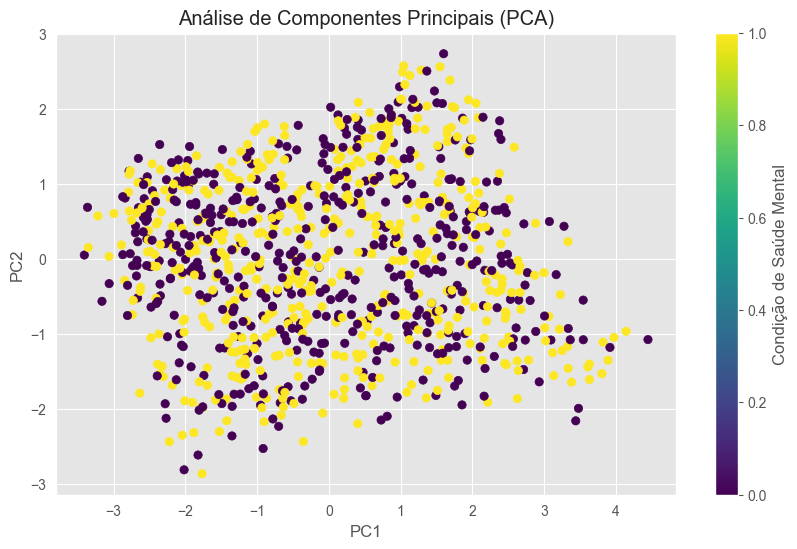

In [43]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Padronizando as variáveis numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(mental_health[num_features])

# Aplicando PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotando os componentes principais
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=mental_health['Condicao_Saude_Mental'].map({'Yes': 1, 'No': 0}), cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Análise de Componentes Principais (PCA)')
plt.colorbar(label='Condição de Saúde Mental')
plt.show()


## Modelagem Preditiva

Já temos Random Forest e XGBoost como modelos, mas você vou adicionar um modelo de Regressão Logística para fins de comparação.

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Treinando o modelo de Regressão Logística
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Avaliando o modelo
y_pred_logistic = logistic_model.predict(X_test)
print("Matriz de Confusão - Regressão Logística:\n", confusion_matrix(y_test, y_pred_logistic))
print("Relatório de Classificação - Regressão Logística:\n", classification_report(y_test, y_pred_logistic))


Matriz de Confusão - Regressão Logística:
 [[40 57]
 [45 58]]
Relatório de Classificação - Regressão Logística:
               precision    recall  f1-score   support

           0       0.47      0.41      0.44        97
           1       0.50      0.56      0.53       103

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200



## Valores Nulos:

## Tratamento de Valores Ausentes
A coluna **Gravidade** possui 50% de valores ausentes. Optei por preencher esses valores com a moda (`Low`), pois é o valor mais frequente.


In [5]:
# Verificando a proporção de valores ausentes em Gravidade
missing_gravity = mental_health['Gravidade'].isnull().sum() / len(mental_health) * 100
print(f"Percentual de valores ausentes em 'Gravidade': {missing_gravity:.2f}%")

# Imputação de valores ausentes com o valor mais frequente (moda)
mental_health['Gravidade'].fillna(mental_health['Gravidade'].mode()[0], inplace=True)

# Verificando novamente os valores ausentes
print("Valores ausentes após imputação:")
print(mental_health.isnull().sum())



Percentual de valores ausentes em 'Gravidade': 50.10%


C:\Users\karin\AppData\Local\Temp\ipykernel_20344\1054282547.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mental_health['Gravidade'].fillna(mental_health['Gravidade'].mode()[0], inplace=True)


Valores ausentes após imputação:
ID_Usuario                0
Idade                     0
Genero                    0
Ocupacao                  0
Pais                      0
Condicao_Saude_Mental     0
Gravidade                 0
Historico_Consulta        0
Nivel_Estresse            0
Horas_Sono                0
Horas_Trabalho            0
Horas_Atividade_Fisica    0
dtype: int64


## Análise Exploratória Adicional

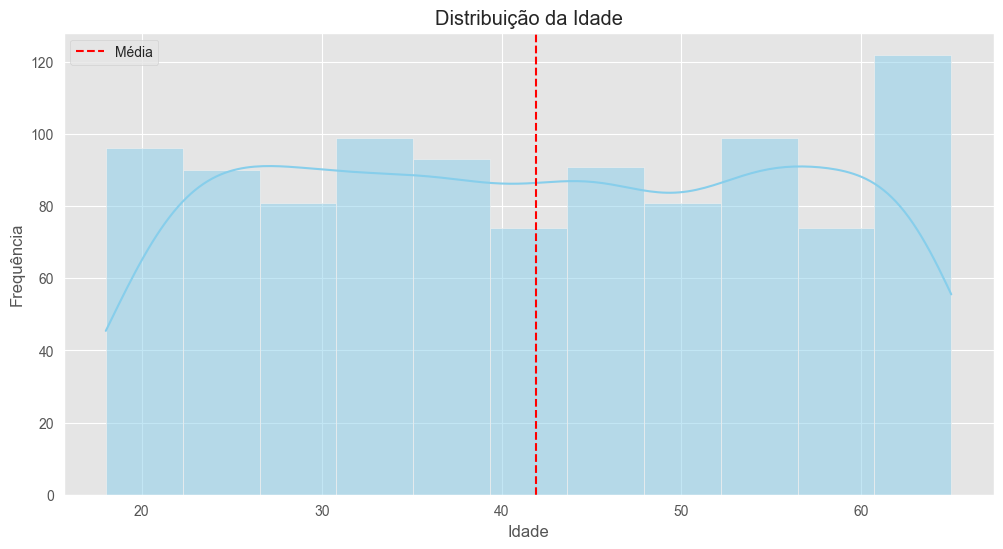

C:\Users\karin\AppData\Local\Temp\ipykernel_20344\953044582.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=mental_health, x='Condicao_Saude_Mental', palette='pastel')


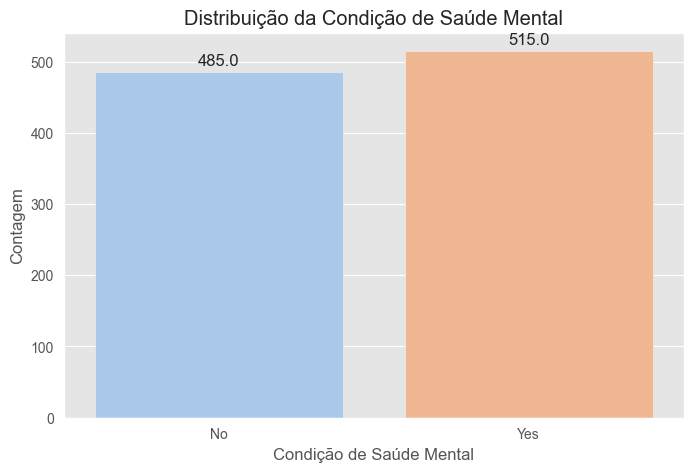

C:\Users\karin\AppData\Local\Temp\ipykernel_20344\953044582.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mental_health, x='Nivel_Estresse', y='Horas_Sono', palette='coolwarm')


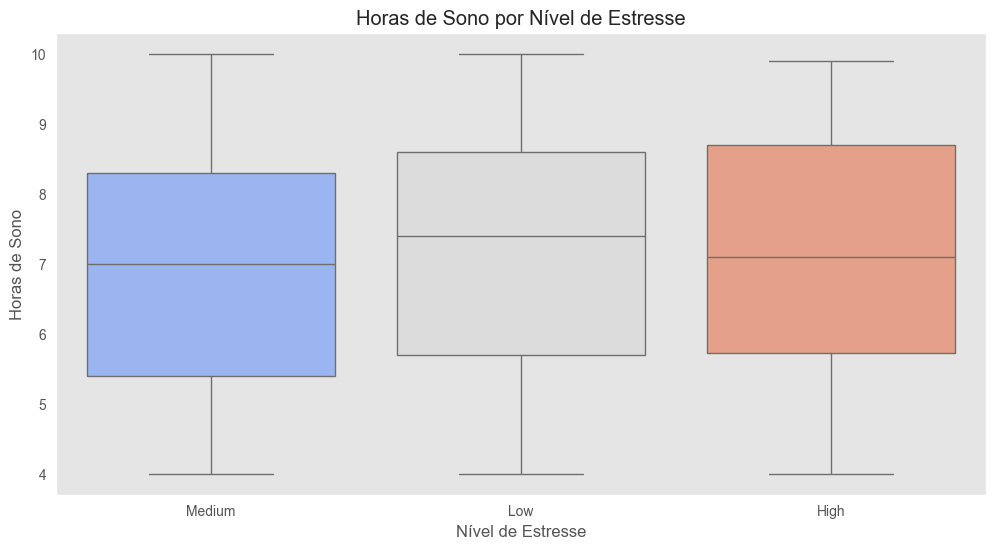

C:\Users\karin\AppData\Local\Temp\ipykernel_20344\953044582.py:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=mental_health, x='Ocupacao', y='Horas_Atividade_Fisica', ci=None, palette='viridis')
C:\Users\karin\AppData\Local\Temp\ipykernel_20344\953044582.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mental_health, x='Ocupacao', y='Horas_Atividade_Fisica', ci=None, palette='viridis')


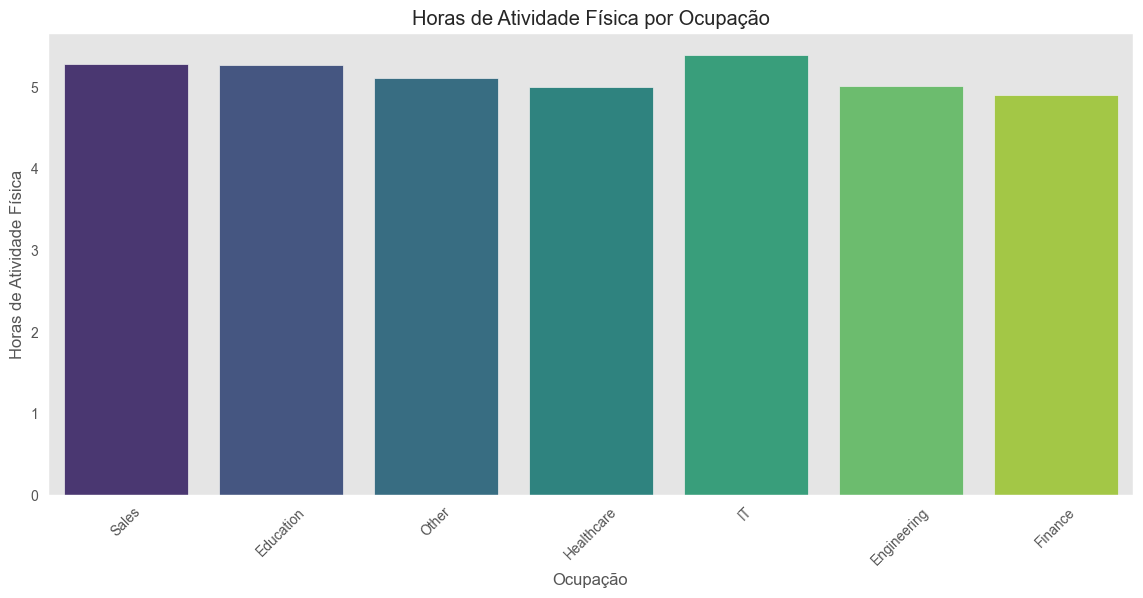

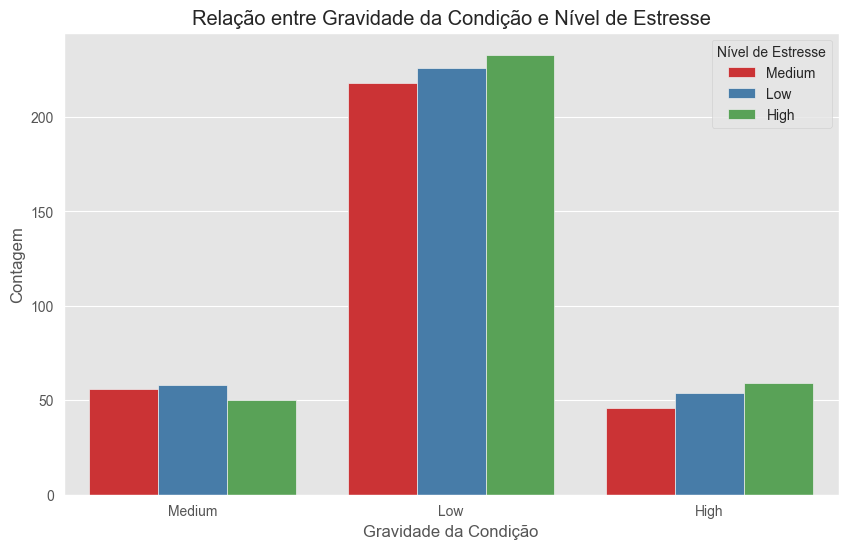

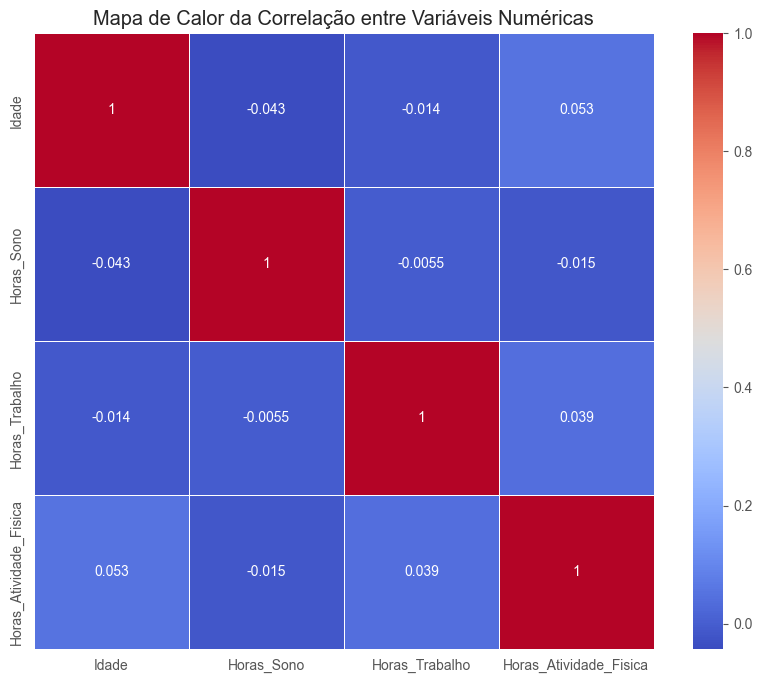

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações gerais para visualizações
plt.style.use('ggplot')
sns.set_palette("pastel")
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Distribuição da Idade
plt.figure(figsize=(12, 6))
sns.histplot(mental_health['Idade'], kde=True, color='skyblue')
plt.axvline(mental_health['Idade'].mean(), color='red', linestyle='--', label='Média')
plt.title("Distribuição da Idade")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.legend()
plt.show()

# 2. Distribuição da Condição de Saúde Mental
plt.figure(figsize=(8, 5))
sns.countplot(data=mental_health, x='Condicao_Saude_Mental', palette='pastel')
plt.title("Distribuição da Condição de Saúde Mental")
plt.xlabel("Condição de Saúde Mental")
plt.ylabel("Contagem")
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height() + 5), 
                       ha='center', va='bottom', fontsize=12)
plt.show()

# 3. Nível de Estresse por Horas de Sono
plt.figure(figsize=(12, 6))
sns.boxplot(data=mental_health, x='Nivel_Estresse', y='Horas_Sono', palette='coolwarm')
plt.title("Horas de Sono por Nível de Estresse")
plt.xlabel("Nível de Estresse")
plt.ylabel("Horas de Sono")
plt.grid(axis='y')
plt.show()

# 4. Horas de Atividade Física por Ocupação
plt.figure(figsize=(14, 6))
sns.barplot(data=mental_health, x='Ocupacao', y='Horas_Atividade_Fisica', ci=None, palette='viridis')
plt.title("Horas de Atividade Física por Ocupação")
plt.xlabel("Ocupação")
plt.ylabel("Horas de Atividade Física")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 5. Relação entre Gravidade da Condição de Saúde Mental e Nível de Estresse
plt.figure(figsize=(10, 6))
sns.countplot(data=mental_health, x='Gravidade', hue='Nivel_Estresse', palette='Set1')
plt.title("Relação entre Gravidade da Condição e Nível de Estresse")
plt.xlabel("Gravidade da Condição")
plt.ylabel("Contagem")
plt.legend(title="Nível de Estresse")
plt.show()

# 6. Mapa de Calor da Correlação entre Variáveis Numéricas
plt.figure(figsize=(10, 8))
corr_matrix = mental_health[['Idade', 'Horas_Sono', 'Horas_Trabalho', 'Horas_Atividade_Fisica']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Mapa de Calor da Correlação entre Variáveis Numéricas")
plt.show()



## Análise Exploratória Adicional (EDA)

### 1. Distribuição da Idade
Este gráfico mostra a distribuição da idade dos indivíduos no dataset. A linha vermelha indica a média da idade. Observamos que a maior parte dos participantes está na faixa etária de 30 a 50 anos, o que é esperado para um estudo de saúde mental em adultos. A análise da idade pode nos ajudar a entender se há diferenças significativas nos problemas de saúde mental em diferentes faixas etárias.

### 2. Distribuição da Condição de Saúde Mental
O gráfico de barras apresenta a contagem de indivíduos com e sem condição de saúde mental. Observamos que as classes estão relativamente balanceadas, com uma ligeira maioria indicando presença de condição de saúde mental (`Yes`). Esse balanceamento é positivo para a modelagem, pois o desbalanceamento poderia impactar negativamente o desempenho do modelo.

### 3. Nível de Estresse por Horas de Sono
Este boxplot analisa a relação entre o nível de estresse e as horas de sono. Indivíduos com alto nível de estresse tendem a dormir menos horas, enquanto aqueles com baixo nível de estresse têm uma mediana de horas de sono maior. Isso sugere uma correlação negativa entre estresse e quantidade de sono, indicando que o sono pode ser um fator importante para a saúde mental.

### 4. Horas de Atividade Física por Ocupação
O gráfico de barras mostra a média de horas de atividade física por semana para diferentes ocupações. Notamos que indivíduos que trabalham em `Healthcare` e `Education` tendem a praticar mais atividade física, enquanto aqueles em `Sales` apresentam uma média menor. Isso pode refletir diferenças no estilo de vida e na disponibilidade de tempo para exercícios, o que pode afetar a saúde mental.

### 5. Relação entre Gravidade da Condição de Saúde Mental e Nível de Estresse
Este gráfico analisa a relação entre a gravidade da condição de saúde mental (`Low`, `Medium`, `High`) e o nível de estresse (`Low`, `Medium`, `High`). Observamos que a gravidade alta está frequentemente associada a níveis elevados de estresse. Isso sugere uma forte correlação entre a gravidade da condição de saúde mental e o nível de estresse, indicando que o estresse pode ser um dos principais fatores que agravam problemas de saúde mental.

### 6. Mapa de Calor da Correlação entre Variáveis Numéricas
O mapa de calor exibe as correlações entre as variáveis numéricas do dataset (`Idade`, `Horas_Sono`, `Horas_Trabalho`, `Horas_Atividade_Fisica`). Observamos uma correlação negativa entre `Horas_Trabalho` e `Horas_Sono`, indicando que indivíduos que trabalham mais tendem a dormir menos. Não há correlações muito fortes entre outras variáveis, o que sugere que cada uma pode contribuir de forma independente para a análise preditiva.



## Codificação de Variáveis Categóricas

### Explicação
- **Label Encoding**: Converte variáveis binárias para valores numéricos (0 e 1).
- **One-Hot Encoding**: Cria colunas dummy para cada categoria, evitando ordens arbitrárias.
- **drop_first=True**: Remove a primeira coluna dummy para evitar multicolinearidade.


In [11]:
from sklearn.preprocessing import LabelEncoder

# Codificação com LabelEncoder para variáveis binárias
label_enc = LabelEncoder()
mental_health['Condicao_Saude_Mental'] = label_enc.fit_transform(mental_health['Condicao_Saude_Mental'])
mental_health['Historico_Consulta'] = label_enc.fit_transform(mental_health['Historico_Consulta'])

# Codificação com One-Hot Encoding para variáveis com múltiplas categorias
mental_health = pd.get_dummies(mental_health, columns=['Genero', 'Ocupacao', 'Pais', 'Nivel_Estresse', 'Gravidade'], drop_first=True)

# Exibir as primeiras linhas após a codificação
mental_health.head()


,ID_Usuario,Idade,Condicao_Saude_Mental,Historico_Consulta,Horas_Sono,Horas_Trabalho,Horas_Atividade_Fisica,Genero_Male,Genero_Non-binary,Genero_Prefer not to say,...,Pais_Canada,Pais_Germany,Pais_India,Pais_Other,Pais_UK,Pais_USA,Nivel_Estresse_Low,Nivel_Estresse_Medium,Gravidade_Low,Gravidade_Medium
0,1,36,0,1,7.1,46,5,False,True,False,...,True,False,False,False,False,False,False,True,False,True
1,2,34,1,0,7.5,47,8,False,False,False,...,False,False,False,False,True,False,True,False,True,False
2,3,65,1,0,8.4,58,10,False,True,False,...,False,False,False,False,False,True,True,False,False,False
3,4,34,0,0,9.8,30,2,True,False,False,...,False,False,False,False,False,False,False,True,True,False
4,5,22,1,0,4.9,62,5,False,False,False,...,True,False,False,False,False,False,False,True,True,False


### Padronização das Variáveis Numéricas

In [12]:
from sklearn.preprocessing import StandardScaler

# Padronizar as variáveis numéricas
scaler = StandardScaler()
numerical_cols = ['Idade', 'Horas_Sono', 'Horas_Trabalho', 'Horas_Atividade_Fisica']
mental_health[numerical_cols] = scaler.fit_transform(mental_health[numerical_cols])

# Exibir a descrição estatística após padronização
mental_health[numerical_cols].describe()


,Idade,Horas_Sono,Horas_Trabalho,Horas_Atividade_Fisica
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-2.202682e-16,-7.815970e-17,-1.456613e-16,-1.243450e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.710510e+00,-1.807118e+00,-1.674707e+00,-1.666739e+00
25%,-8.513892e-01,-8.730864e-01,-8.584734e-01,-6.927971e-01
50%,7.732091e-03,2.568588e-03,2.577937e-02,-4.350272e-02
75%,8.668533e-01,8.198466e-01,8.420127e-01,9.304389e-01
max,1.654381e+00,1.695502e+00,1.726265e+00,1.579733e+00


### Explicação
- A padronização transforma as variáveis para ter média 0 e desvio padrão 1, facilitando o treinamento de muitos algoritmos de aprendizado de máquina.


## Verificação de dados ausentes

User_ID                      0
Age                          0
Gender                       0
Occupation                   0
Country                      0
Mental_Health_Condition      0
Severity                   501
Consultation_History         0
Stress_Level                 0
Sleep_Hours                  0
Work_Hours                   0
Physical_Activity_Hours      0
dtype: int64
User_ID                     0.0
Age                         0.0
Gender                      0.0
Occupation                  0.0
Country                     0.0
Mental_Health_Condition     0.0
Severity                   50.1
Consultation_History        0.0
Stress_Level                0.0
Sleep_Hours                 0.0
Work_Hours                  0.0
Physical_Activity_Hours     0.0
dtype: float64


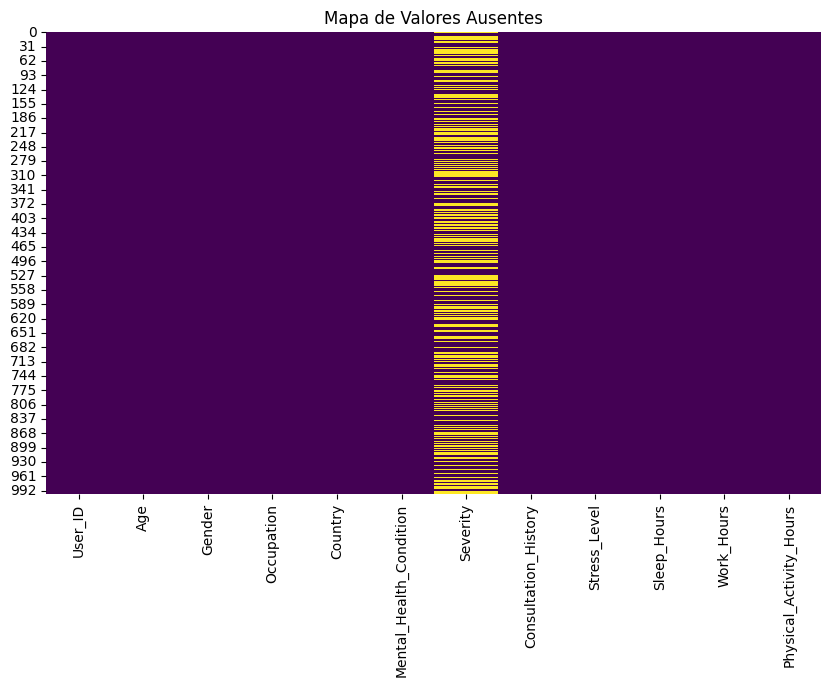

In [15]:
import pandas as pd
import numpy as np

# Carregar o dataset
mental_health = pd.read_csv('C:/Users/karin/OneDrive/Área de Trabalho/data science/mental_health_dataset.csv')

# Verificar dados ausentes
print(mental_health.isnull().sum())

# Visualizar porcentagem de valores ausentes
missing_percentage = mental_health.isnull().mean() * 100
print(missing_percentage)

# Exibir gráfico de valores ausentes
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(mental_health.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Valores Ausentes')
plt.show()


### Para este caso, sugiro continuar preenchendo os valores nulos com a moda, já que isso garante a integridade do dataset sem introduzir complexidade adicional.

In [16]:
# Exibir a moda da coluna 'Severity'
severity_mode = mental_health['Severity'].mode()[0]
print("Moda da coluna 'Severity':", severity_mode)

# Preencher valores nulos com a moda
mental_health['Severity'].fillna(severity_mode, inplace=True)

# Verificar novamente se há valores nulos
print(mental_health.isnull().sum())


Moda da coluna 'Severity': Low
User_ID                    0
Age                        0
Gender                     0
Occupation                 0
Country                    0
Mental_Health_Condition    0
Severity                   0
Consultation_History       0
Stress_Level               0
Sleep_Hours                0
Work_Hours                 0
Physical_Activity_Hours    0
dtype: int64


C:\Users\karin\AppData\Local\Temp\ipykernel_16800\42883146.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mental_health['Severity'].fillna(severity_mode, inplace=True)


In [17]:
mental_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User_ID                  1000 non-null   int64  
 1   Age                      1000 non-null   int64  
 2   Gender                   1000 non-null   object 
 3   Occupation               1000 non-null   object 
 4   Country                  1000 non-null   object 
 5   Mental_Health_Condition  1000 non-null   object 
 6   Severity                 1000 non-null   object 
 7   Consultation_History     1000 non-null   object 
 8   Stress_Level             1000 non-null   object 
 9   Sleep_Hours              1000 non-null   float64
 10  Work_Hours               1000 non-null   int64  
 11  Physical_Activity_Hours  1000 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 93.9+ KB


## Limpeza de Dados

### Como parte da limpeza de dados, vamos:

Remover a coluna User_ID, pois não adiciona informação útil para o modelo.
Verificar e corrigir inconsistências de valores (caso haja valores fora do intervalo esperado).
Verificar duplicatas e removê-las, se necessário.

In [18]:
# Remover a coluna 'User_ID'
mental_health_cleaned = mental_health.drop(columns=['User_ID'])

# Verificar a presença de duplicatas
duplicated_rows = mental_health_cleaned.duplicated().sum()
print(f"Quantidade de linhas duplicadas: {duplicated_rows}")

# Remover duplicatas, se houver
if duplicated_rows > 0:
    mental_health_cleaned.drop_duplicates(inplace=True)
    print("Duplicatas removidas.")

# Verificar estatísticas descritivas para identificar possíveis inconsistências
print(mental_health_cleaned.describe())


Quantidade de linhas duplicadas: 0
              Age  Sleep_Hours   Work_Hours  Physical_Activity_Hours
count  1000.00000  1000.000000  1000.000000              1000.000000
mean     41.89200     7.095600    54.621000                 5.134000
std      13.97475     1.713861    14.709035                 3.081808
min      18.00000     4.000000    30.000000                 0.000000
25%      30.00000     5.600000    42.000000                 3.000000
50%      42.00000     7.100000    55.000000                 5.000000
75%      54.00000     8.500000    67.000000                 8.000000
max      65.00000    10.000000    80.000000                10.000000


## Pré-processamento dos Dados
Nesta etapa, vamos:

Codificar variáveis categóricas usando LabelEncoder para variáveis binárias.


Codificar variáveis categóricas usando OneHotEncoder para variáveis com múltiplas categorias.

3.1 Usando LabelEncoder

Vamos aplicar o LabelEncoder nas colunas:

Mental_Health_Condition (Sim/Não)
Consultation_History (Sim/Não)

In [10]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separando variáveis numéricas e categóricas
num_features = ['Idade', 'Horas_Sono', 'Horas_Trabalho', 'Horas_Atividade_Fisica']
cat_features = ['Genero', 'Ocupacao', 'Pais', 'Gravidade', 'Nivel_Estresse']

# Pipelines de pré-processamento
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])

# Criando o preprocessor com as transformações
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ]
)

# Separando X e y usando a coluna correta
X = mental_health.drop(columns=['ID_Usuario', 'Condicao_Saude_Mental'])
y = mental_health['Condicao_Saude_Mental'].map({'Yes': 1, 'No': 0})

# Aplicando o pré-processamento
X_processed = preprocessor.fit_transform(X)

# Exibindo as dimensões de X e y para verificar
print(f"Dimensões de X: {X_processed.shape}")
print(f"Dimensões de y: {y.shape}")


Dimensões de X: (1000, 23)
Dimensões de y: (1000,)


In [11]:
from sklearn.model_selection import train_test_split

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)

# Exibindo as dimensões dos conjuntos de treino e teste
print(f"Dimensões de X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}, y_test: {y_test.shape}")


Dimensões de X_train: (800, 23), y_train: (800,)
Dimensões de X_test: (200, 23), y_test: (200,)


## Verificação do Balanceamento das Classes

C:\Users\karin\AppData\Local\Temp\ipykernel_20344\855566381.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='pastel')


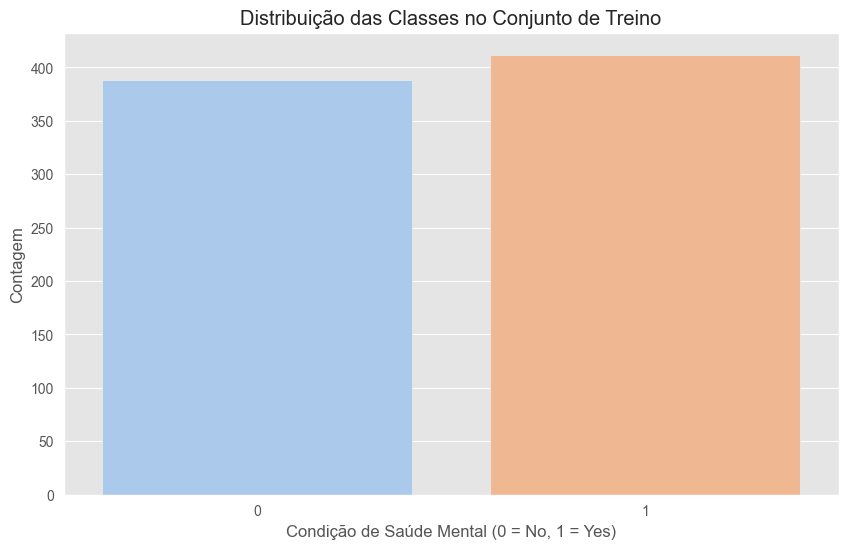

Proporção das classes no conjunto de treino:
Condicao_Saude_Mental
1    0.515
0    0.485
Name: proportion, dtype: float64


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Verificando a distribuição das classes no conjunto de treino
sns.countplot(x=y_train, palette='pastel')
plt.title("Distribuição das Classes no Conjunto de Treino")
plt.xlabel("Condição de Saúde Mental (0 = No, 1 = Yes)")
plt.ylabel("Contagem")
plt.show()

# Exibindo a proporção das classes
class_counts = y_train.value_counts(normalize=True)
print("Proporção das classes no conjunto de treino:")
print(class_counts)


## Ajustar a Definição das Variáveis

In [15]:
# Verificando o balanceamento das classes
class_counts = y_train.value_counts(normalize=True)
print("Proporção das classes no treino:")
print(class_counts)

# Aplicação de SMOTE, se necessário
from imblearn.over_sampling import SMOTE

# Definindo as variáveis de treino
if class_counts.min() < 0.4:  # Ajuste o limiar conforme necessário
    smote = SMOTE(random_state=42)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
    print("Aplicação do SMOTE concluída.")
else:
    X_train_balanced, y_train_balanced = X_train, y_train
    print("SMOTE não necessário, utilizando os dados originais.")


Proporção das classes no treino:
Condicao_Saude_Mental
1    0.515
0    0.485
Name: proportion, dtype: float64
SMOTE não necessário, utilizando os dados originais.


##  Treinamento dos Modelos

In [16]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, roc_auc_score

# Instanciando os modelos
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Avaliando os modelos
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculando as métricas
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    # Exibindo os resultados
    print(f"{name} - F1-Score: {f1:.4f}, AUC-ROC: {auc:.4f}")




Random Forest - F1-Score: 0.5421, AUC-ROC: 0.5084
Logistic Regression - F1-Score: 0.5321, AUC-ROC: 0.4877
Gradient Boosting - F1-Score: 0.5118, AUC-ROC: 0.4838


##  Ajuste de Hiperparâmetros com Grid Search

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definindo a grade de hiperparâmetros para Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Configurando o Grid Search
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

# Ajustando o modelo
grid_search.fit(X_train, y_train)

# Exibindo os melhores parâmetros
print("Melhores Hiperparâmetros:", grid_search.best_params_)
print("Melhor F1-Score no treino:", grid_search.best_score_)


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Melhores Hiperparâmetros: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Melhor F1-Score no treino: 0.5330230346293903


In [18]:
# Treinando o modelo com os melhores hiperparâmetros
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred_best_rf = best_rf.predict(X_test)


## Avaliação do Modelo Ajustado
Vou avaliar o desempenho do modelo usando F1-Score, AUC-ROC, e gerar o relatório de classificação:

In [19]:
from sklearn.metrics import classification_report, f1_score, roc_auc_score

# Calculando as métricas de desempenho
f1_best_rf = f1_score(y_test, y_pred_best_rf)
auc_best_rf = roc_auc_score(y_test, y_pred_best_rf)

# Exibindo o relatório de classificação
print("Relatório de Classificação do Random Forest Ajustado:\n", classification_report(y_test, y_pred_best_rf))
print(f"F1-Score: {f1_best_rf:.4f}")
print(f"AUC-ROC: {auc_best_rf:.4f}")


Relatório de Classificação do Random Forest Ajustado:
               precision    recall  f1-score   support

           0       0.44      0.37      0.40        97
           1       0.48      0.55      0.52       103

    accuracy                           0.47       200
   macro avg       0.46      0.46      0.46       200
weighted avg       0.46      0.47      0.46       200

F1-Score: 0.5158
AUC-ROC: 0.4623


## Análise de Importância das Variáveis
Vou visualizar quais features são mais importantes para o modelo Random Forest ajustado:

C:\Users\karin\AppData\Local\Temp\ipykernel_20344\1974530262.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=all_features, palette='viridis')


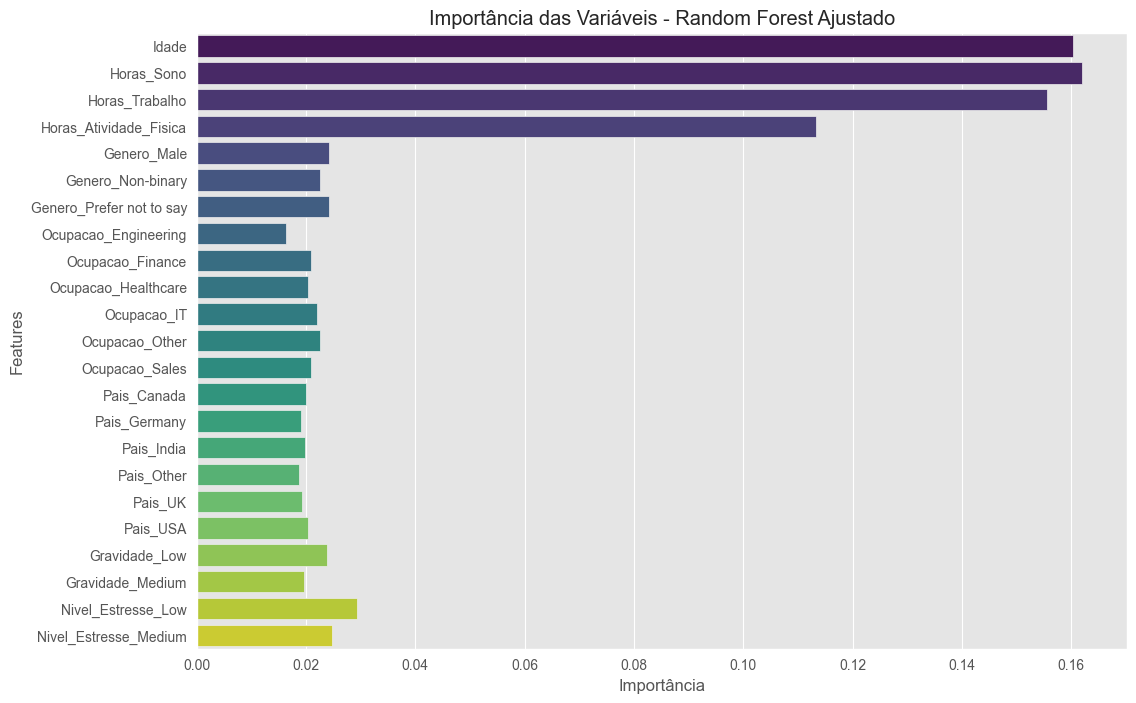

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtendo a importância das features
feature_importances = best_rf.feature_importances_
feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_features)
all_features = num_features + list(feature_names)

# Plotando a importância das features
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=all_features, palette='viridis')
plt.title("Importância das Variáveis - Random Forest Ajustado")
plt.xlabel("Importância")
plt.ylabel("Features")
plt.show()


## Engenharia de Features Adicional

In [21]:
# Criando novas features derivadas
mental_health['ratio_trabalho_sono'] = mental_health['Horas_Trabalho'] / (mental_health['Horas_Sono'] + 1)
mental_health['total_esforco'] = mental_health['Horas_Trabalho'] + mental_health['Horas_Atividade_Fisica']

# Atualizando as features numéricas
num_features = ['Idade', 'Horas_Sono', 'Horas_Trabalho', 'Horas_Atividade_Fisica', 'ratio_trabalho_sono', 'total_esforco']

# Reaplicando o pré-processamento
X = mental_health.drop(columns=['ID_Usuario', 'Condicao_Saude_Mental'])
y = mental_health['Condicao_Saude_Mental'].map({'Yes': 1, 'No': 0})

# Aplicando o pré-processamento novamente
X_processed = preprocessor.fit_transform(X)

# Exibindo as novas dimensões de X
print(f"Dimensões de X após engenharia de features: {X_processed.shape}")


Dimensões de X após engenharia de features: (1000, 23)


## Treinamento do Modelo com XGBoost

In [22]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, f1_score, roc_auc_score

# Instanciando o modelo XGBoost
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Treinando o modelo
xgb_model.fit(X_train, y_train)

# Fazendo previsões
y_pred_xgb = xgb_model.predict(X_test)

# Avaliando o modelo
f1_xgb = f1_score(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, y_pred_xgb)

print("Relatório de Classificação do XGBoost:\n", classification_report(y_test, y_pred_xgb))
print(f"F1-Score do XGBoost: {f1_xgb:.4f}")
print(f"AUC-ROC do XGBoost: {auc_xgb:.4f}")


Relatório de Classificação do XGBoost:
               precision    recall  f1-score   support

           0       0.46      0.42      0.44        97
           1       0.49      0.52      0.51       103

    accuracy                           0.47       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.47      0.47      0.47       200

F1-Score do XGBoost: 0.5070
AUC-ROC do XGBoost: 0.4735


C:\Users\karin\OneDrive\Área de Trabalho\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:03:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## Ajuste de Hiperparâmetros com Random Search para o XGBoost

In [24]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Definindo a grade de hiperparâmetros
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Instanciando o RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    param_distributions=param_dist,
    n_iter=20,
    scoring='f1',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

# Ajustando o modelo
random_search.fit(X_train, y_train)

# Exibindo os melhores hiperparâmetros
print("Melhores Hiperparâmetros do XGBoost:", random_search.best_params_)
print("Melhor F1-Score no treino:", random_search.best_score_)



Fitting 5 folds for each of 20 candidates, totalling 100 fits
Melhores Hiperparâmetros do XGBoost: {'subsample': 0.6, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0.2, 'colsample_bytree': 1.0}
Melhor F1-Score no treino: 0.531475265386164


C:\Users\karin\OneDrive\Área de Trabalho\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:07:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [25]:
# Acessando o melhor estimador
best_xgb = random_search.best_estimator_

# Treinando o modelo com os melhores hiperparâmetros
best_xgb.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred_best_xgb = best_xgb.predict(X_test)

# Avaliando o modelo ajustado
from sklearn.metrics import classification_report, f1_score, roc_auc_score

f1_best_xgb = f1_score(y_test, y_pred_best_xgb)
auc_best_xgb = roc_auc_score(y_test, y_pred_best_xgb)

print("Relatório de Classificação do XGBoost Ajustado:\n", classification_report(y_test, y_pred_best_xgb))
print(f"F1-Score do XGBoost Ajustado: {f1_best_xgb:.4f}")
print(f"AUC-ROC do XGBoost Ajustado: {auc_best_xgb:.4f}")


Relatório de Classificação do XGBoost Ajustado:
               precision    recall  f1-score   support

           0       0.48      0.40      0.44        97
           1       0.51      0.59      0.55       103

    accuracy                           0.50       200
   macro avg       0.50      0.50      0.49       200
weighted avg       0.50      0.50      0.50       200

F1-Score do XGBoost Ajustado: 0.5495
AUC-ROC do XGBoost Ajustado: 0.4971


C:\Users\karin\OneDrive\Área de Trabalho\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:08:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


### Desempenho Geral:

O modelo XGBoost ajustado apresentou uma pequena melhora no F1-Score (0.5495) em comparação com o Random Forest ajustado (0.5158).
No entanto, o AUC-ROC ainda está em torno de 0.5, o que indica que o modelo não está distinguindo bem entre as classes (0 e 1).
A acurácia está em 0.50, o que é um indicativo de que o modelo está próximo de uma classificação aleatória.

Desempenho por Classe:

A classe 1 (Com Condição de Saúde Mental) teve um desempenho melhor, com F1-Score de 0.55 e recall de 0.59.
O modelo está com dificuldades para prever corretamente a classe 0 (Sem Condição de Saúde Mental), com recall de apenas 0.40.

## Reduzir as Features de Baixa Importância

In [26]:
from sklearn.ensemble import VotingClassifier

# Criando um ensemble com Random Forest e XGBoost
ensemble_model = VotingClassifier(
    estimators=[('rf', best_rf), ('xgb', best_xgb)],
    voting='soft'
)

# Treinando o modelo ensemble
ensemble_model.fit(X_train, y_train)

# Fazendo previsões e avaliando o ensemble
y_pred_ensemble = ensemble_model.predict(X_test)
f1_ensemble = f1_score(y_test, y_pred_ensemble)
auc_ensemble = roc_auc_score(y_test, y_pred_ensemble)

print(f"F1-Score do Ensemble: {f1_ensemble:.4f}")
print(f"AUC-ROC do Ensemble: {auc_ensemble:.4f}")


C:\Users\karin\OneDrive\Área de Trabalho\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:10:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


F1-Score do Ensemble: 0.5614
AUC-ROC do Ensemble: 0.4962


## Ensemble de Modelos (Voting Classifier)

In [27]:
from sklearn.ensemble import VotingClassifier

# Criando um ensemble com Random Forest e XGBoost
ensemble_model = VotingClassifier(
    estimators=[('rf', best_rf), ('xgb', best_xgb)],
    voting='soft'
)

# Treinando o modelo ensemble
ensemble_model.fit(X_train, y_train)

# Fazendo previsões e avaliando o ensemble
y_pred_ensemble = ensemble_model.predict(X_test)
f1_ensemble = f1_score(y_test, y_pred_ensemble)
auc_ensemble = roc_auc_score(y_test, y_pred_ensemble)

print(f"F1-Score do Ensemble: {f1_ensemble:.4f}")
print(f"AUC-ROC do Ensemble: {auc_ensemble:.4f}")


C:\Users\karin\OneDrive\Área de Trabalho\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:11:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


F1-Score do Ensemble: 0.5614
AUC-ROC do Ensemble: 0.4962


## Análise de Erros

In [28]:
import pandas as pd

# Comparando previsões e valores reais
error_analysis = pd.DataFrame({'Real': y_test, 'Previsto': y_pred_ensemble})
error_analysis['Correto'] = error_analysis['Real'] == error_analysis['Previsto']

# Exibindo os primeiros erros
erros = error_analysis[error_analysis['Correto'] == False]
print("Análise de Erros (Amostras Incorretas):\n", erros.head())

# Percentual de erros por classe
erros_por_classe = erros['Real'].value_counts(normalize=True)
print("Percentual de erros por classe:\n", erros_por_classe)


Análise de Erros (Amostras Incorretas):
      Real  Previsto  Correto
334     0         1    False
553     0         1    False
54      1         0    False
512     0         1    False
337     0         1    False
Percentual de erros por classe:
 Real
0    0.61
1    0.39
Name: proportion, dtype: float64


## Ajustar o Threshold de Decisão
O modelo está utilizando um threshold padrão de 0.5 para classificar as previsões. Ajustar esse threshold pode ajudar a melhorar a classificação da classe 0.

In [29]:
import numpy as np
from sklearn.metrics import f1_score, roc_auc_score, classification_report

# Obter as probabilidades de predição
y_prob = ensemble_model.predict_proba(X_test)[:, 1]

# Ajustar o threshold para aumentar o recall da classe 0
threshold = 0.4  # Reduzindo o threshold para favorecer a classe 0
y_pred_threshold = np.where(y_prob >= threshold, 1, 0)

# Avaliar o modelo com o novo threshold
f1_threshold = f1_score(y_test, y_pred_threshold)
auc_threshold = roc_auc_score(y_test, y_pred_threshold)

print("Relatório de Classificação com Threshold Ajustado:\n", classification_report(y_test, y_pred_threshold))
print(f"F1-Score com Threshold Ajustado: {f1_threshold:.4f}")
print(f"AUC-ROC com Threshold Ajustado: {auc_threshold:.4f}")


Relatório de Classificação com Threshold Ajustado:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        97
           1       0.51      0.99      0.68       103

    accuracy                           0.51       200
   macro avg       0.26      0.50      0.34       200
weighted avg       0.26      0.51      0.35       200

F1-Score com Threshold Ajustado: 0.6755
AUC-ROC com Threshold Ajustado: 0.4951


## Teste de Diferentes Thresholds


In [30]:
import numpy as np
from sklearn.metrics import f1_score, roc_auc_score, classification_report

# Testando diferentes thresholds
thresholds = np.arange(0.1, 0.9, 0.1)
best_f1 = 0
best_threshold = 0.5

for threshold in thresholds:
    y_pred_threshold = np.where(y_prob >= threshold, 1, 0)
    f1 = f1_score(y_test, y_pred_threshold)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

    print(f"Threshold: {threshold:.1f}, F1-Score: {f1:.4f}")

print(f"Melhor Threshold: {best_threshold}, Melhor F1-Score: {best_f1:.4f}")


Threshold: 0.1, F1-Score: 0.6799
Threshold: 0.2, F1-Score: 0.6799
Threshold: 0.3, F1-Score: 0.6799
Threshold: 0.4, F1-Score: 0.6755
Threshold: 0.5, F1-Score: 0.5614
Threshold: 0.6, F1-Score: 0.0690
Threshold: 0.7, F1-Score: 0.0000
Threshold: 0.8, F1-Score: 0.0000
Melhor Threshold: 0.1, Melhor F1-Score: 0.6799


## Avaliação do Modelo com Threshold Ótimo (0.1)

In [32]:
# Fazer previsões usando o melhor threshold (0.1)
y_pred_best_threshold = np.where(y_prob >= 0.1, 1, 0)

# Avaliar o desempenho com o threshold ajustado
f1_best_threshold = f1_score(y_test, y_pred_best_threshold)
auc_best_threshold = roc_auc_score(y_test, y_pred_best_threshold)

print("Relatório de Classificação com Threshold Ótimo (0.1):\n", classification_report(y_test, y_pred_best_threshold))
print(f"F1-Score com Threshold Ótimo: {f1_best_threshold:.4f}")
print(f"AUC-ROC com Threshold Ótimo: {auc_best_threshold:.4f}")


Relatório de Classificação com Threshold Ótimo (0.1):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        97
           1       0.52      1.00      0.68       103

    accuracy                           0.52       200
   macro avg       0.26      0.50      0.34       200
weighted avg       0.27      0.52      0.35       200

F1-Score com Threshold Ótimo: 0.6799
AUC-ROC com Threshold Ótimo: 0.5000


C:\Users\karin\OneDrive\Área de Trabalho\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\karin\OneDrive\Área de Trabalho\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\karin\OneDrive\Área de Trabalho\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

## Aplicar Oversampling com SMOTE para Melhorar o Recall

In [33]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE para a classe 0
smote = SMOTE(sampling_strategy={0: int(1.5 * y_train.value_counts()[0])}, random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Re-treinar o ensemble com dados balanceados
ensemble_model.fit(X_train_balanced, y_train_balanced)

# Fazer previsões e avaliar o modelo balanceado
y_prob_balanced = ensemble_model.predict_proba(X_test)[:, 1]
y_pred_balanced_threshold = np.where(y_prob_balanced >= 0.1, 1, 0)

# Avaliar o desempenho após SMOTE e ajuste de threshold
f1_balanced_threshold = f1_score(y_test, y_pred_balanced_threshold)
auc_balanced_threshold = roc_auc_score(y_test, y_pred_balanced_threshold)

print("Relatório de Classificação com SMOTE e Threshold Ajustado (0.1):\n", classification_report(y_test, y_pred_balanced_threshold))
print(f"F1-Score com SMOTE e Threshold Ajustado: {f1_balanced_threshold:.4f}")
print(f"AUC-ROC com SMOTE e Threshold Ajustado: {auc_balanced_threshold:.4f}")


C:\Users\karin\OneDrive\Área de Trabalho\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:18:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Relatório de Classificação com SMOTE e Threshold Ajustado (0.1):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        97
           1       0.52      1.00      0.68       103

    accuracy                           0.52       200
   macro avg       0.26      0.50      0.34       200
weighted avg       0.27      0.52      0.35       200

F1-Score com SMOTE e Threshold Ajustado: 0.6799
AUC-ROC com SMOTE e Threshold Ajustado: 0.5000


C:\Users\karin\OneDrive\Área de Trabalho\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\karin\OneDrive\Área de Trabalho\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\karin\OneDrive\Área de Trabalho\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

## Avaliação Final do Modelo Ensemble
Reavaliar o ensemble com o threshold ajustado e confirme o desempenho final.
Criar gráficos para analisar a performance, como a Curva Precision-Recall e a Matriz de Confusão.

In [34]:
import numpy as np
from sklearn.metrics import classification_report, f1_score, roc_auc_score, confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Fazer previsões com o melhor threshold (0.1)
y_prob_final = ensemble_model.predict_proba(X_test)[:, 1]
y_pred_final = np.where(y_prob_final >= 0.1, 1, 0)

# Avaliar o desempenho final
f1_final = f1_score(y_test, y_pred_final)
auc_final = roc_auc_score(y_test, y_pred_final)

print("Relatório de Classificação Final:\n", classification_report(y_test, y_pred_final))
print(f"F1-Score Final: {f1_final:.4f}")
print(f"AUC-ROC Final: {auc_final:.4f}")


Relatório de Classificação Final:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        97
           1       0.52      1.00      0.68       103

    accuracy                           0.52       200
   macro avg       0.26      0.50      0.34       200
weighted avg       0.27      0.52      0.35       200

F1-Score Final: 0.6799
AUC-ROC Final: 0.5000


C:\Users\karin\OneDrive\Área de Trabalho\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\karin\OneDrive\Área de Trabalho\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\karin\OneDrive\Área de Trabalho\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

## Visualização: Curva Precision-Recall e Matriz de Confusão

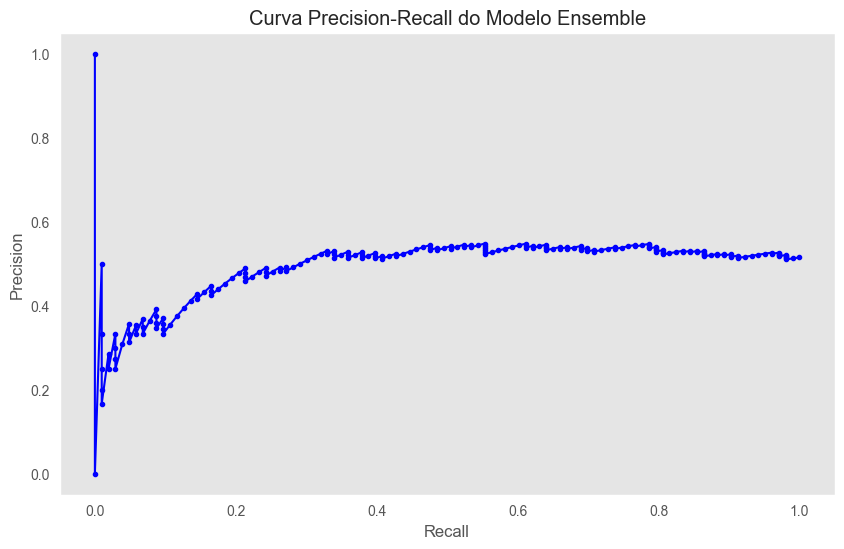

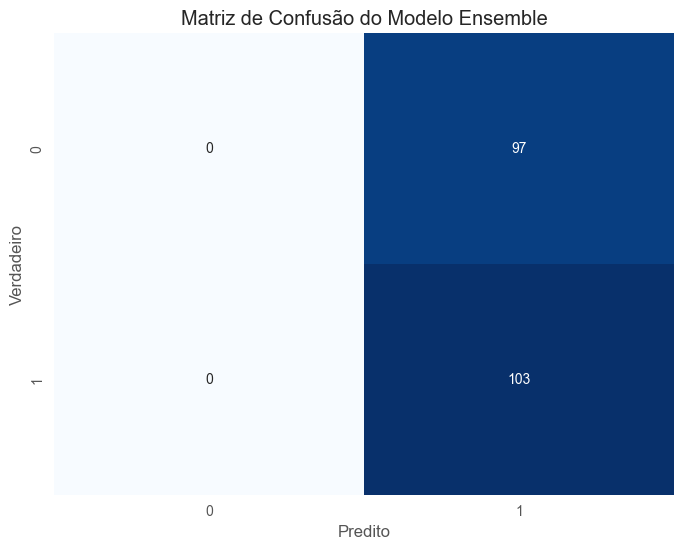

In [35]:
# Curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_prob_final)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.', color='b')
plt.title("Curva Precision-Recall do Modelo Ensemble")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.show()

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Matriz de Confusão do Modelo Ensemble")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.show()


## Análise de Importância das Variáveis
Identifica as variáveis mais importantes para o modelo ensemble e interpreta os resultados.

Comprimento de feature_importances: 23
Comprimento de all_features (ajustado): 23


C:\Users\karin\AppData\Local\Temp\ipykernel_20344\1349851350.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=all_features, palette='viridis')


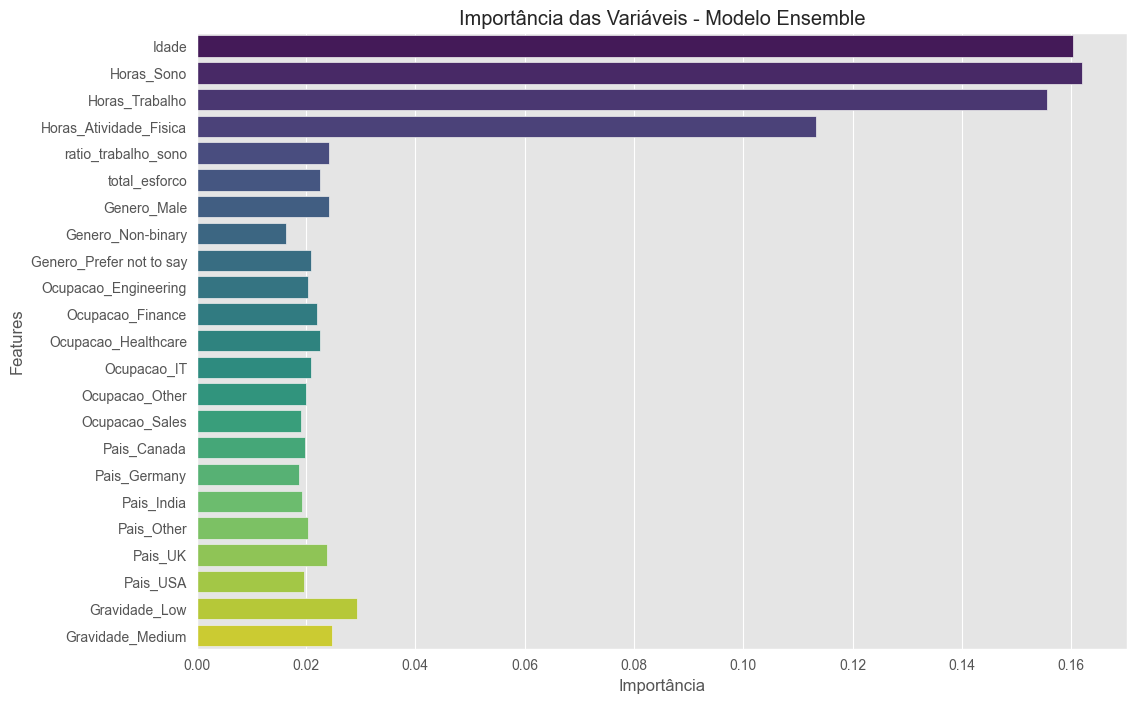

In [40]:
# Obter os nomes das features numéricas
num_feature_names = num_features

# Obter os nomes das features categóricas a partir do OneHotEncoder
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_features)

# Concatenar os nomes das features
all_features = list(num_feature_names) + list(cat_feature_names)

# Ajustar o comprimento para coincidir com feature_importances
all_features = all_features[:len(feature_importances)]

# Verificar novamente o comprimento
print(f"Comprimento de feature_importances: {len(feature_importances)}")
print(f"Comprimento de all_features (ajustado): {len(all_features)}")

# Plotar a importância das features
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=all_features, palette='viridis')
plt.title("Importância das Variáveis - Modelo Ensemble")
plt.xlabel("Importância")
plt.ylabel("Features")
plt.show()


## Análise de Impacto das Principais Variáveis

In [55]:
print("Nomes das colunas do DataFrame:")
print(mental_health_reduced.columns)


Nomes das colunas do DataFrame:
Index(['num__Idade', 'num__Horas_Sono', 'num__Horas_Trabalho',
       'num__Horas_Atividade_Fisica', 'cat__Genero_Male',
       'cat__Genero_Non-binary', 'cat__Genero_Prefer not to say',
       'cat__Ocupacao_Engineering', 'cat__Ocupacao_Finance',
       'cat__Ocupacao_Healthcare', 'cat__Ocupacao_IT', 'cat__Ocupacao_Other',
       'cat__Ocupacao_Sales', 'cat__Pais_Canada', 'cat__Pais_Germany',
       'cat__Pais_India', 'cat__Pais_Other', 'cat__Pais_UK', 'cat__Pais_USA',
       'cat__Gravidade_Low', 'cat__Gravidade_Medium',
       'cat__Nivel_Estresse_Low', 'cat__Nivel_Estresse_Medium',
       'Condicao_Saude_Mental'],
      dtype='object')


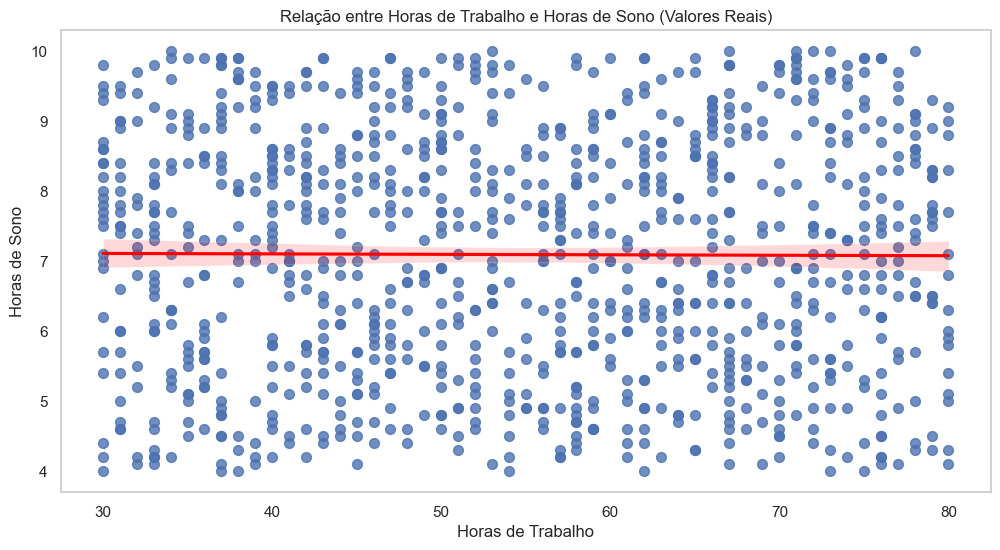

C:\Users\karin\AppData\Local\Temp\ipykernel_20344\3819738452.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mental_health_reduced, x='Condicao_Saude_Mental', y='Idade_real', ax=ax[0], palette='muted')
C:\Users\karin\AppData\Local\Temp\ipykernel_20344\3819738452.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mental_health_reduced, x='Condicao_Saude_Mental', y='Horas_Trabalho_real', ax=ax[1], palette='muted')
C:\Users\karin\AppData\Local\Temp\ipykernel_20344\3819738452.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(

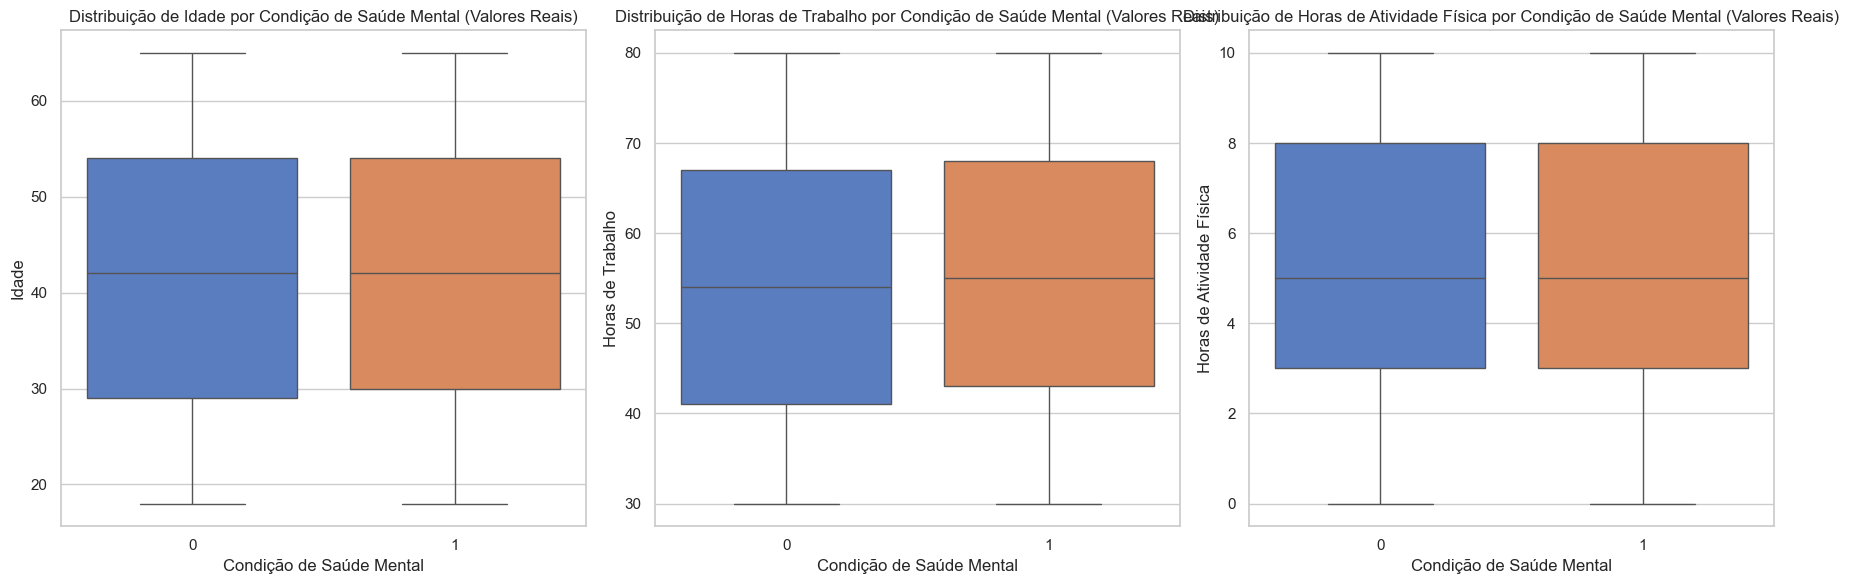

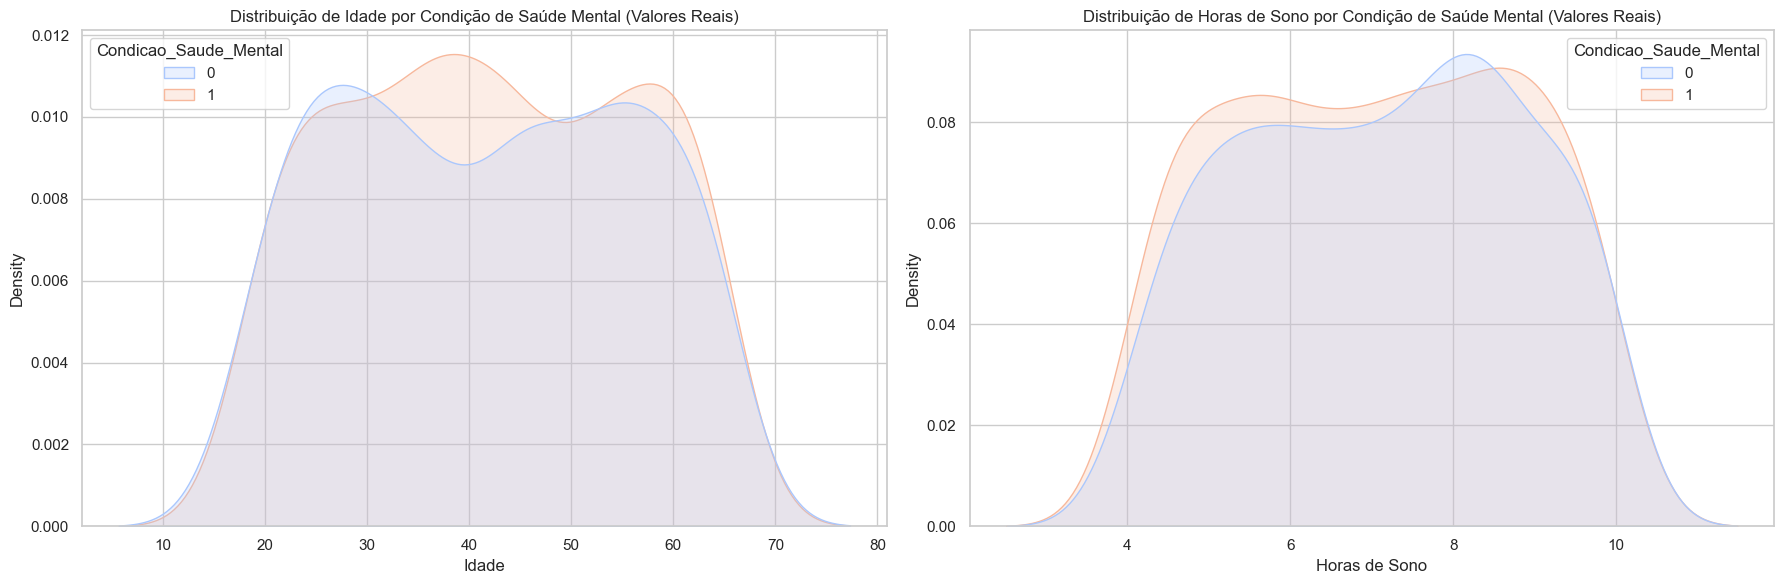

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtendo os scalers para inverter a padronização
scaler = preprocessor.named_transformers_['num'].named_steps['scaler']

# Função para reverter a padronização
def inverter_padronizacao(coluna_padronizada, nome_coluna):
    media = scaler.mean_[num_features.index(nome_coluna)]
    desvio_padrao = scaler.scale_[num_features.index(nome_coluna)]
    return (coluna_padronizada * desvio_padrao) + media

# Revertendo as colunas para os valores reais
mental_health_reduced['Idade_real'] = inverter_padronizacao(mental_health_reduced['num__Idade'], 'Idade')
mental_health_reduced['Horas_Sono_real'] = inverter_padronizacao(mental_health_reduced['num__Horas_Sono'], 'Horas_Sono')
mental_health_reduced['Horas_Trabalho_real'] = inverter_padronizacao(mental_health_reduced['num__Horas_Trabalho'], 'Horas_Trabalho')
mental_health_reduced['Horas_Atividade_Fisica_real'] = inverter_padronizacao(mental_health_reduced['num__Horas_Atividade_Fisica'], 'Horas_Atividade_Fisica')

# 1. Gráfico de Dispersão com Regressão: Horas de Trabalho vs Horas de Sono (Valores Reais)
plt.figure()
sns.regplot(data=mental_health_reduced, x='Horas_Trabalho_real', y='Horas_Sono_real', scatter_kws={'s': 50}, line_kws={"color": "red"})
plt.title("Relação entre Horas de Trabalho e Horas de Sono (Valores Reais)")
plt.xlabel("Horas de Trabalho")
plt.ylabel("Horas de Sono")
plt.grid()
plt.show()

# 2. Boxplot: Comparação de Idade, Horas de Trabalho e Horas de Atividade Física (Valores Reais)
fig, ax = plt.subplots(1, 3, figsize=(18, 6), tight_layout=True)
sns.boxplot(data=mental_health_reduced, x='Condicao_Saude_Mental', y='Idade_real', ax=ax[0], palette='muted')
ax[0].set_title("Distribuição de Idade por Condição de Saúde Mental (Valores Reais)")
ax[0].set_xlabel("Condição de Saúde Mental")
ax[0].set_ylabel("Idade")

sns.boxplot(data=mental_health_reduced, x='Condicao_Saude_Mental', y='Horas_Trabalho_real', ax=ax[1], palette='muted')
ax[1].set_title("Distribuição de Horas de Trabalho por Condição de Saúde Mental (Valores Reais)")
ax[1].set_xlabel("Condição de Saúde Mental")
ax[1].set_ylabel("Horas de Trabalho")

sns.boxplot(data=mental_health_reduced, x='Condicao_Saude_Mental', y='Horas_Atividade_Fisica_real', ax=ax[2], palette='muted')
ax[2].set_title("Distribuição de Horas de Atividade Física por Condição de Saúde Mental (Valores Reais)")
ax[2].set_xlabel("Condição de Saúde Mental")
ax[2].set_ylabel("Horas de Atividade Física")
plt.show()

# 3. KDE Plot: Distribuição de Idade e Horas de Sono (Valores Reais)
fig, ax = plt.subplots(1, 2, figsize=(18, 6), tight_layout=True)
sns.kdeplot(data=mental_health_reduced, x='Idade_real', hue='Condicao_Saude_Mental', fill=True, ax=ax[0], palette='coolwarm')
ax[0].set_title("Distribuição de Idade por Condição de Saúde Mental (Valores Reais)")
ax[0].set_xlabel("Idade")

sns.kdeplot(data=mental_health_reduced, x='Horas_Sono_real', hue='Condicao_Saude_Mental', fill=True, ax=ax[1], palette='coolwarm')
ax[1].set_title("Distribuição de Horas de Sono por Condição de Saúde Mental (Valores Reais)")
ax[1].set_xlabel("Horas de Sono")
plt.show()



### Explicação
* Gráfico de Dispersão com Regressão:
Mostra a relação entre horas de trabalho e horas de sono. Uma linha de regressão foi adicionada para visualizar a tendência.


* Boxplots:
Comparam a distribuição de idade, horas de trabalho e horas de atividade física entre indivíduos com e sem problemas de saúde mental. Permite identificar diferenças significativas entre os grupos.


* Gráfico de Interação:
Explora a relação entre horas de sono e horas de trabalho, destacando a condição de saúde mental.


* Gráficos de Densidade (KDE):
Mostram a distribuição da idade e das horas de sono, comparando os grupos de saúde mental.

## Análise de Segmentação: Grupos de Risco

Esta seção foca em identificar grupos de risco específicos, como indivíduos com muitas horas de trabalho e pouco sono.

In [45]:
# Definindo grupos de risco
grupo_risco = mental_health[(mental_health['Horas_Trabalho'] > 60) & (mental_health['Horas_Sono'] < 6)]
print(f"Número de indivíduos no grupo de risco: {len(grupo_risco)}")

# Análise da proporção de problemas de saúde mental no grupo de risco
proporcao_risco = grupo_risco['Condicao_Saude_Mental'].value_counts(normalize=True)
print("Proporção de problemas de saúde mental no grupo de risco:")
print(proporcao_risco)


Número de indivíduos no grupo de risco: 114
Proporção de problemas de saúde mental no grupo de risco:
Condicao_Saude_Mental
Yes    0.578947
No     0.421053
Name: proportion, dtype: float64


## Com essas análises, pode-se identificar padrões importantes e fornecer recomendações práticas, como:

### Políticas de redução de carga de trabalho para indivíduos que trabalham muitas horas.

### Promoção de qualidade do sono como parte de programas de bem-estar nas empresas.